In [4]:
import pandas as pd 
import matplotlib.pyplot as plt

In [5]:
dataset = pd.read_csv(r"C:\Users\sulta\Downloads\Superstore.csv",encoding='latin1')
dataset.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [9]:
dataset.isnull().sum().sum()

np.int64(0)

In [10]:
dataset.duplicated().sum()

np.int64(0)

In [11]:
dataset['Order Date'] = pd.to_datetime(dataset['Order Date'])
dataset['Ship Date'] = pd.to_datetime(dataset['Ship Date'])

In [13]:
# Statistical summary dekhein
print(dataset[['Sales', 'Quantity', 'Discount', 'Profit']].describe())

              Sales     Quantity     Discount       Profit
count   9994.000000  9994.000000  9994.000000  9994.000000
mean     229.858001     3.789574     0.156203    28.656896
std      623.245101     2.225110     0.206452   234.260108
min        0.444000     1.000000     0.000000 -6599.978000
25%       17.280000     2.000000     0.000000     1.728750
50%       54.490000     3.000000     0.200000     8.666500
75%      209.940000     5.000000     0.200000    29.364000
max    22638.480000    14.000000     0.800000  8399.976000


In [14]:
# 1. Total Sales kitni hui?
total_sales = dataset['Sales'].sum()

# 2. Total Profit kitna hua?
total_profit = dataset['Profit'].sum()

# 3. Average Profit Margin kitna hai?
avg_margin = (dataset['Profit'].sum() / dataset['Sales'].sum()) * 100

print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Profit Margin: {avg_margin:.2f}%")

Total Sales: $2,297,200.86
Total Profit: $286,397.02
Profit Margin: 12.47%


In [15]:
# 1. Top 5 Products by Sales
top_products = dataset.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(5)

# 2. Top 5 Cities by Profit
top_cities = dataset.groupby('City')['Profit'].sum().sort_values(ascending=False).head(5)

print("--- Top 5 Products ---\n", top_products)
print("\n--- Top 5 Cities ---\n", top_cities)

--- Top 5 Products ---
 Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
Name: Sales, dtype: float64

--- Top 5 Cities ---
 City
New York City    62036.9837
Los Angeles      30440.7579
Seattle          29156.0967
San Francisco    17507.3854
Detroit          13181.7908
Name: Profit, dtype: float64


In [16]:
# Un products ko dekhein jahan loss ho raha hai
loss_data = dataset[dataset['Profit'] < 0]

# Kaunsi Category mein sabse zyada loss hai?
loss_by_category = loss_data.groupby('Category')['Profit'].sum().sort_values()

print("\n--- Loss by Category ---\n", loss_by_category)


--- Loss by Category ---
 Category
Furniture         -60936.1090
Office Supplies   -56615.2585
Technology        -38579.9182
Name: Profit, dtype: float64


In [18]:
# Mahina aur Saal alag karein
dataset['Order Month'] = dataset['Order Date'].dt.month_name()
dataset['Order Year'] = dataset['Order Date'].dt.year

# Ek "Profit Margin %" ka column banayein
dataset['Profit Margin %'] = (dataset['Profit'] / dataset['Sales']) * 100

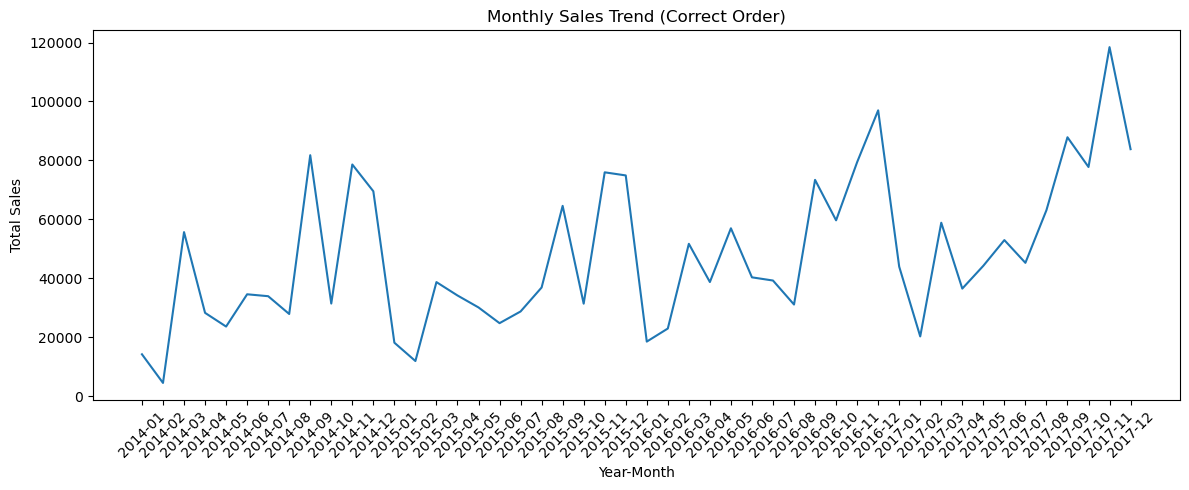

In [20]:


# Proper monthly aggregation (date ko month start me convert karo)
dataset['Order Date'] = pd.to_datetime(dataset['Order Date'])
dataset['YearMonth'] = dataset['Order Date'].dt.to_period('M')

monthly_sales = dataset.groupby('YearMonth')['Sales'].sum().reset_index()

# Period ko string me convert karo for plotting
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].astype(str)

plt.figure(figsize=(12,5))
plt.plot(monthly_sales['YearMonth'], monthly_sales['Sales'])
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend (Correct Order)")
plt.xlabel("Year-Month")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

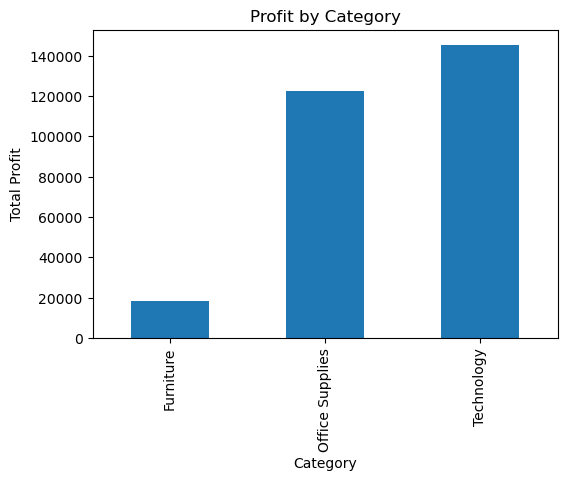

In [21]:
category_profit = dataset.groupby('Category')['Profit'].sum()

plt.figure(figsize=(6,4))
category_profit.plot(kind='bar')
plt.title("Profit by Category")
plt.ylabel("Total Profit")
plt.show()

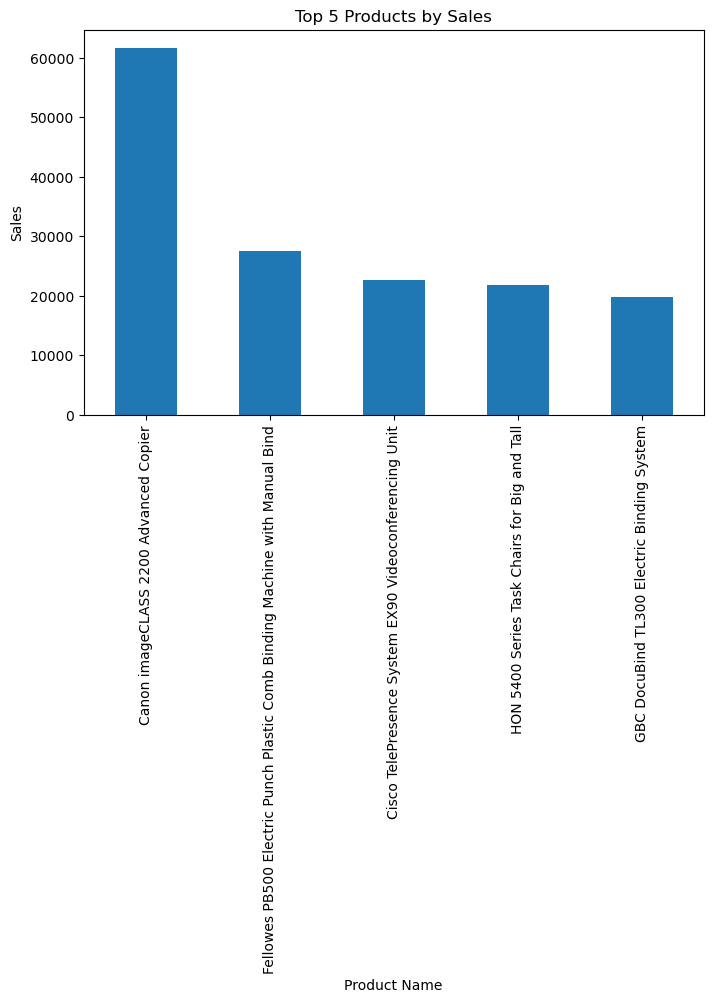

In [22]:
top_products = dataset.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8,5))
top_products.plot(kind='bar')
plt.title("Top 5 Products by Sales")
plt.ylabel("Sales")
plt.show()

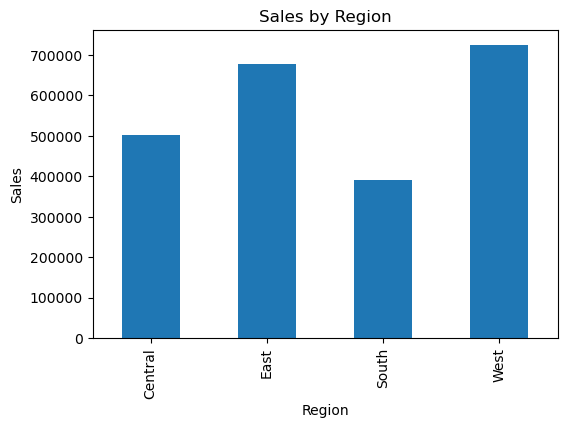

In [23]:
region_sales = dataset.groupby('Region')['Sales'].sum()

plt.figure(figsize=(6,4))
region_sales.plot(kind='bar')
plt.title("Sales by Region")
plt.ylabel("Sales")
plt.show()

In [24]:
print("----- KPI SUMMARY -----")

total_sales = dataset['Sales'].sum()
total_profit = dataset['Profit'].sum()
total_orders = dataset['Order ID'].nunique()
avg_order_value = total_sales / total_orders

print(f"Total Sales: {round(total_sales,2)}")
print(f"Total Profit: {round(total_profit,2)}")
print(f"Total Orders: {total_orders}")
print(f"Average Order Value: {round(avg_order_value,2)}")

----- KPI SUMMARY -----
Total Sales: 2297200.86
Total Profit: 286397.02
Total Orders: 5009
Average Order Value: 458.61


# 📊 Sales Data Analysis Project

## 🎯 Objective
To analyze sales performance and generate business insights.

## 📈 Key Business Insights
- Furniture category is generating highest loss.
- Sales peak in November and December.
- Technology category shows stable profit.
- Top 5 products overall revenue ka significant contribution karte hain.
- Certain regions consistent high sales generate kar rahe hain.



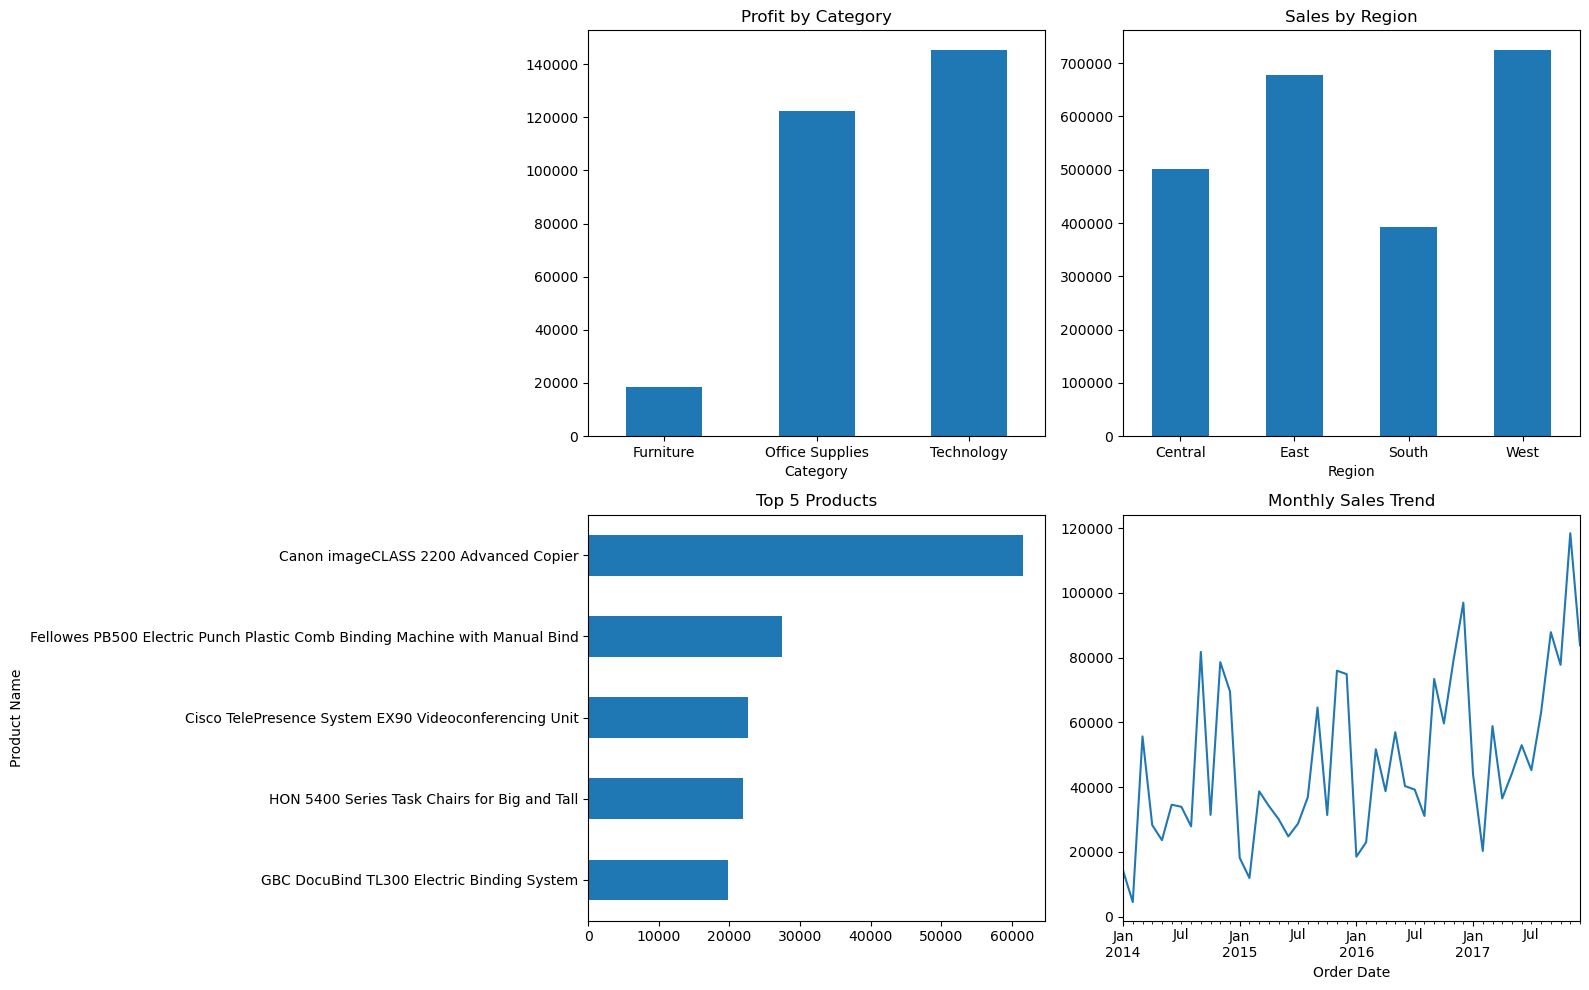

In [26]:


plt.figure(figsize=(16,10))

# 1️⃣ Profit by Category
plt.subplot(2,2,1)
dataset.groupby('Category')['Profit'].sum().plot(kind='bar')
plt.title("Profit by Category")
plt.xticks(rotation=0)

# 2️⃣ Sales by Region
plt.subplot(2,2,2)
dataset.groupby('Region')['Sales'].sum().plot(kind='bar')
plt.title("Sales by Region")
plt.xticks(rotation=0)

# 3️⃣ Top 5 Products (Horizontal for readability 🔥)
plt.subplot(2,2,3)
dataset.groupby('Product Name')['Sales'].sum() \
    .sort_values(ascending=False).head(5) \
    .sort_values().plot(kind='barh')
plt.title("Top 5 Products")

# 4️⃣ Monthly Sales Trend
plt.subplot(2,2,4)
monthly_sales = dataset.groupby(dataset['Order Date'].dt.to_period('M'))['Sales'].sum()
monthly_sales.plot()
plt.title("Monthly Sales Trend")

plt.tight_layout()
plt.show()